In [1]:
%run ../../_setup.py

import numpy as np

from netCDF4 import Dataset
import matplotlib.pyplot as plt
from gsw import sigma0

In [2]:
# load ctd and gsw data
input_file = os.path.join(datadir, 'processed', 'ss9802', 'netcdf', 'ss9802_ctd_gsw.nc')
ctd = Dataset(input_file, 'r')
ctd.variables.keys()

odict_keys(['ts_lat', 'station', 'depth', 'bot_lat', 't', 'lat', 'bot_lon', 'O2', 'ts_t', 'SP', 'time', 'lon', 'ts_SP', 'p', 'ts_lon', 'ts_O2', 'latv', 'pt', 'SA', 'Vg', 'spiciness0', 'lonv', 'z', 'g', 'CT', 'deltaD', 'sigma0', 'gamman'])

In [3]:
SAi = np.linspace(np.nanmin(ctd['SA'][2:,]), np.nanmax(ctd['SA'][2:,]))
pti = np.linspace(np.nanmin(ctd['pt'][2:,]), np.nanmax(ctd['pt'][2:,]))
SAgrd, ptgrd = np.meshgrid(SAi, pti)

sig0grd = sigma0(SAgrd, ptgrd)


transects = {1: list(range(3, 11)), 2: list(reversed(range(11, 19))), 3: list(range(19, 28)),
         4: list(reversed(range(27, 35))), 5: list(range(37, 47)), 6: list(reversed(range(47, 58))),
         7: list(range(57, 66)), 8: list(range(69, 77)), 9: list(reversed(range(77, 85))),
         10: list(range(85, 92)), 11: list(reversed([94, 93] + list(range(95, 102))))}


# find indices for pressure levels in CTD prodiles
pressure_levels = {}
for ip, p in enumerate(ctd['p'][:]):
    pressure_levels[p] = ip

# define reference and interest level 
# p_ref = 1494
p_int = 2

# get dynamic height contours
D = np.array([ctd['deltaD'][profile, pressure_levels[p_int]] / 
              ctd['g'][profile, pressure_levels[p_int]]
              for profile in range(len(ctd.dimensions['profile']))])


/home/janjaapmeijer/miniconda3/envs/ocean36/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Warning: converting a masked element to nan.


In [10]:
help(plt.cm.jet)

Help on LinearSegmentedColormap in module matplotlib.colors object:

class LinearSegmentedColormap(Colormap)
 |  Colormap objects based on lookup tables using linear segments.
 |  
 |  The lookup table is generated using linear interpolation for each
 |  primary color, with the 0-1 domain divided into any number of
 |  segments.
 |  
 |  Method resolution order:
 |      LinearSegmentedColormap
 |      Colormap
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, segmentdata, N=256, gamma=1.0)
 |      Create color map from linear mapping segments
 |      
 |      segmentdata argument is a dictionary with a red, green and blue
 |      entries. Each entry should be a list of *x*, *y0*, *y1* tuples,
 |      forming rows in a table. Entries for alpha are optional.
 |      
 |      Example: suppose you want red to increase from 0 to 1 over
 |      the bottom half, green to do the same over the middle half,
 |      and blue over the top half.  Then you would us

In [4]:
ip = pressure_levels[200]
theta400db = np.array([ctd['pt'][station, ip] for station in range(ctd['pt'].shape[0])])
np.where(theta400db <= 2.12)

(array([], dtype=int64),)

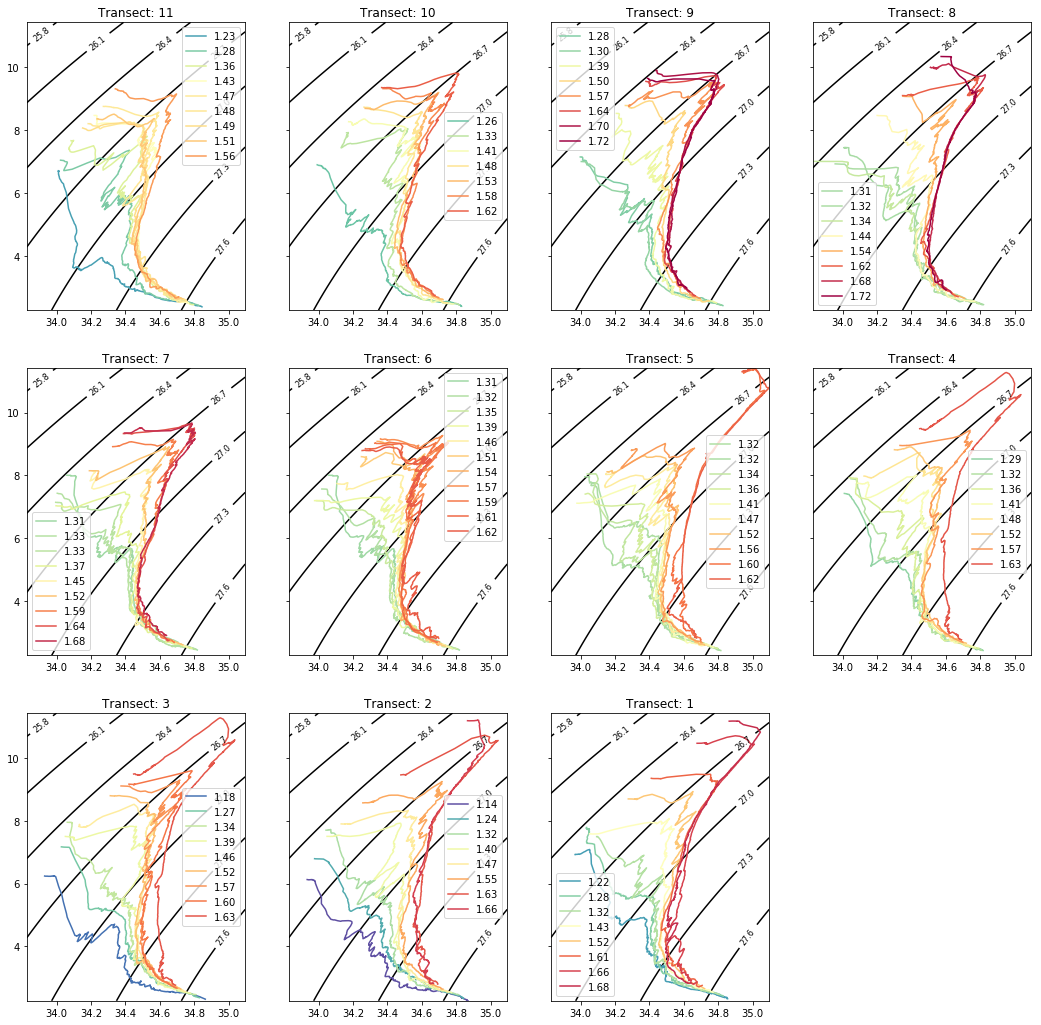

In [17]:
# cmap = plt.cm.get_cmap('Spectral_r')
# rgba = cmap(0.5)

def norm(val, values):
    return (val - np.nanmin(values)) / float(np.nanmax(values) - np.nanmin(values))

fig, ax = plt.subplots(3, 4, figsize=(18, 18), sharey=True)
for transect in reversed(list(transects.keys())):
    row, col = abs(transect - 11) // 4, abs(transect - 11) % 4

    
    ct = ax[row, col].contour(SAgrd, ptgrd, sig0grd, colors='k')
    ax[row, col].clabel(ct, inline=1, fontsize=8, fmt='%.1f')
    
    
    for ist, station in enumerate(transects[transect]):
#         norm = (D[station-1] - np.nanmin(D)) / (np.nanmax(D) - np.nanmin(D))
        color = plt.cm.Spectral_r(norm(D[station-1], D))
        ax[row, col].plot(ctd['SA'][station-1], ctd['pt'][station-1], 
                          label='{0:.2f}'.format(D[station-1]), color=color)
    ax[row, col].legend()
    ax[row, col].set_title('Transect: %s' % transect)
fig.delaxes(ax[2][3])

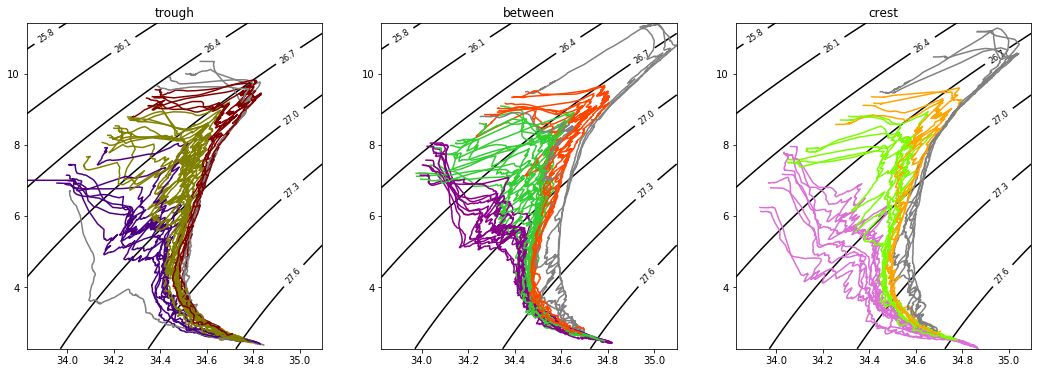

In [13]:
nts = len(transects.keys())
odds = [1, 2, 9, 10, 11, 12, 27, 45, 46, 47, 75, 76, 77, 78, 101]

areas = {'trough': range(8, 12), 
         'between': range(4, 8), 
         'crest': range(1, 4)}

# colors = {'trough': ['purple', 'red', 'blue'],
#           'between': ['grey', 'grey', 'grey'],
#           'crest': ['cyan', 'magenta', 'purple']}

colors = {'trough': ['indigo', 'maroon', 'olive'],
          'between': ['darkmagenta', 'orangered', 'limegreen'],
          'crest': ['orchid', 'orange', 'lawngreen']}

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for ia, area in enumerate(areas.keys()):
    ct = ax[ia].contour(SAgrd, ptgrd, sig0grd, colors='k')
    ax[ia].clabel(ct, inline=1, fontsize=8, fmt='%.1f')

    for transect in areas[area]:
        
        for station in transects[transect]:
            ist = station - 1
            if station in odds:
                ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color='grey')
            
#             elif area == 'trough':
#                 cmap = plt.cm.get_cmap('PuOr_r')
#                 norm = (D[station-1] - np.nanmin(D)) / (np.nanmax(D) - np.nanmin(D))
#                 ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color=cmap(norm))
#             elif area == 'between':
#                 cmap = plt.cm.get_cmap('PuOr_r')
#                 norm = (D[station-1] - np.nanmin(D)) / (np.nanmax(D) - np.nanmin(D))
#                 ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color=cmap(norm))
#             elif area == 'crest':
#                 cmap = plt.cm.get_cmap('PuOr_r')
#                 norm = (D[station-1] - np.nanmin(D)) / (np.nanmax(D) - np.nanmin(D))
#                 ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color=cmap(norm))
            elif 1.35 <= D[ist] <= 1.55:
                ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color=colors[area][2])
            elif 1.1 < D[ist] < 1.35:
                ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color=colors[area][0])#cmap(transect/nts)
            elif 1.55 < D[ist] < 1.8:
                ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color=colors[area][1])
#             elif station in odds:
#                 ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color='grey')
            else:
                ax[ia].plot(ctd['SA'][ist], ctd['pt'][ist], color='yellow')

    ax[ia].set_title(area)

#             else:
#     #             cmap = plt.cm.get_cmap('Greens')
#                 ax.plot(ctd['SA'][ist], ctd['CT'][ist], color=color[2])
#             ax.set_label('T{:01d}.{:02d}'.format(transect, station))

# plt.legend()
# len(transects.keys())
# idx-1

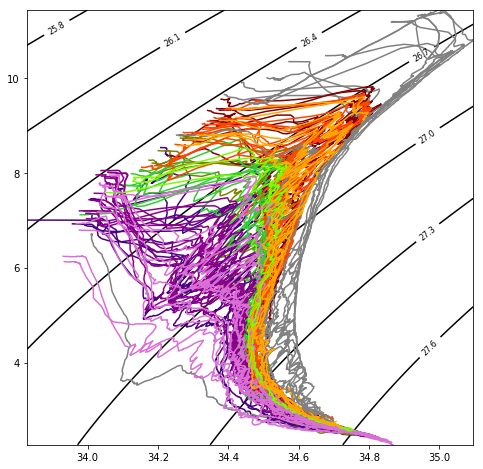

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ct = ax.contour(SAgrd, ptgrd, sig0grd, colors='k')
ax.clabel(ct, inline=1, fontsize=8, fmt='%.1f')

for area in areas.keys():

    for transect in areas[area]:
        
        for station in transects[transect]:

            ist = station - 1
            if station in odds:
                ax.plot(ctd['SA'][ist], ctd['pt'][ist], color='grey')
            elif D[ist] < 1.4:
                ax.plot(ctd['SA'][ist], ctd['pt'][ist], color=colors[area][0])#cmap(transect/nts)
            elif D[ist] > 1.5:
                ax.plot(ctd['SA'][ist], ctd['pt'][ist], color=colors[area][1])
            else:
                ax.plot(ctd['SA'][ist], ctd['pt'][ist], color=colors[area][2])


# plt.cm.Reds
# plt.cm.Oranges
# plt.cm.Greens
# plt.cm.Blues
# plt.cm.Purples



In [8]:
len(areas[area])

3